## 1. Data Import

#### 1.1 Package Import

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('car_prices.csv')

In [21]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## 2. Data Preview

#### 2.1 Basic Information

##### 2.1.1 Length

In [22]:
print(f'{len(df)} rows of data')

558837 rows of data


##### 2.1.2 Columns/Categories

In [23]:
print(f'{len(df.columns)} columns: ')
for col in df.columns:
    print(f'* {col}')

16 columns: 
* year
* make
* model
* trim
* body
* transmission
* vin
* state
* condition
* odometer
* color
* interior
* seller
* mmr
* sellingprice
* saledate


##### 2.1.3 NA values

In [24]:
print(df.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


## 3. Data Cleaning
* Drop all NA values
* Drop seller, saledate, state, vin columns

In [25]:
dfc = df.drop(columns = ['seller', 'saledate', 'state', 'vin'])
dfc = dfc.dropna()
len(dfc)

472325

##### Check Selling Price's mean, max, and min value
* Drop rows with selling price = 1

In [26]:
print(f"Selling price mean: {dfc['sellingprice'].mean()}")
print(f"Selling price max: {dfc['sellingprice'].max()}")
print(f"Selling price min: {dfc['sellingprice'].min()}")

Selling price mean: 13690.51205843434
Selling price max: 230000.0
Selling price min: 1.0


In [27]:
dfc = dfc[dfc['sellingprice'] >= 100]

In [28]:
print(f"Selling price mean: {dfc['sellingprice'].mean()}")
print(f"Selling price max: {dfc['sellingprice'].max()}")
print(f"Selling price min: {dfc['sellingprice'].min()}")

Selling price mean: 13690.57002517345
Selling price max: 230000.0
Selling price min: 100.0


##### Check Year mean, max, and min value

In [29]:
print(f"Year mean: {dfc['year'].mean()}")
print(f"Year max: {dfc['year'].max()}")
print(f"Year min: {dfc['year'].min()}")

Year mean: 2010.2109869728977
Year max: 2015
Year min: 1990


##### Check odometer mean, max, and min value
* Drop abnormal odometer

In [30]:
print(f"odometer mean: {dfc['odometer'].mean()}")
print(f"odometer max: {dfc['odometer'].max()}")
print(f"odometer min: {dfc['odometer'].min()}")

odometer mean: 66701.94697061121
odometer max: 999999.0
odometer min: 1.0


In [31]:
dfc = dfc[dfc['odometer'] >= 100]
dfc = dfc[dfc['odometer'] <= 800000]

In [32]:
print(f"odometer mean: {dfc['odometer'].mean()}")
print(f"odometer max: {dfc['odometer'].max()}")
print(f"odometer min: {dfc['odometer'].min()}")

odometer mean: 66766.84917908166
odometer max: 694978.0
odometer min: 100.0


##### Check condition mean, max, and min value

In [33]:
print(f"condition mean: {dfc['condition'].mean()}")
print(f"condition max: {dfc['condition'].max()}")
print(f"condition min: {dfc['condition'].min()}")

condition mean: 30.82333480557868
condition max: 49.0
condition min: 1.0


##### Drop all rows that color and interior column is number or symbol

In [34]:
dfc = dfc[dfc['color'].str.isalpha()]
dfc = dfc[dfc['interior'].str.isalpha()]

In [35]:
len(dfc)

437640

## 4. Initial Visualization

### 4.1 Distributions

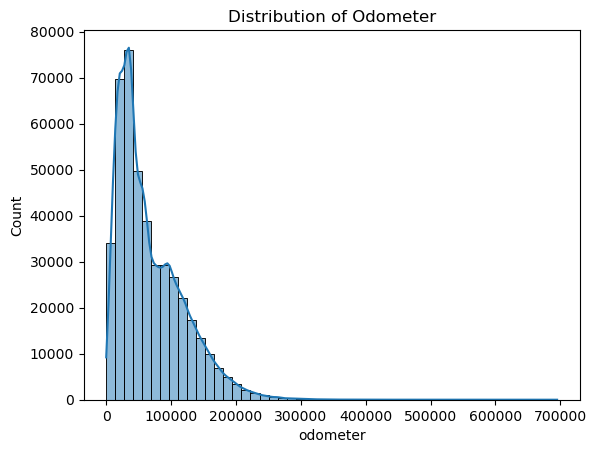

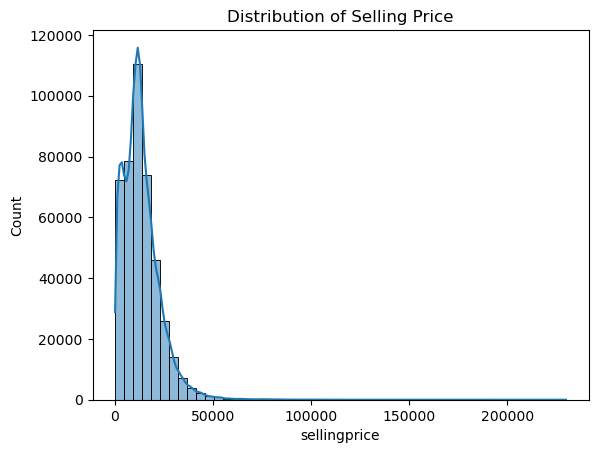

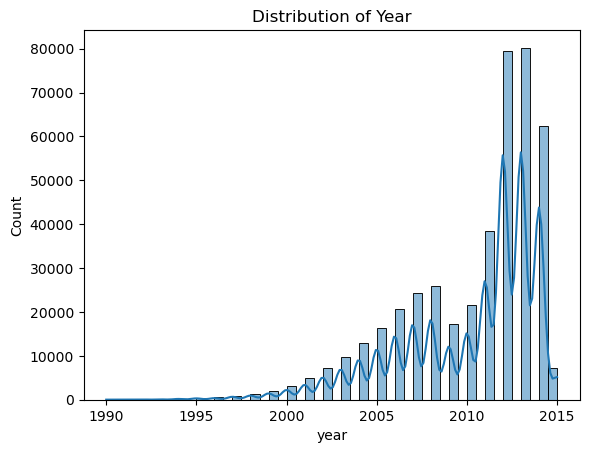

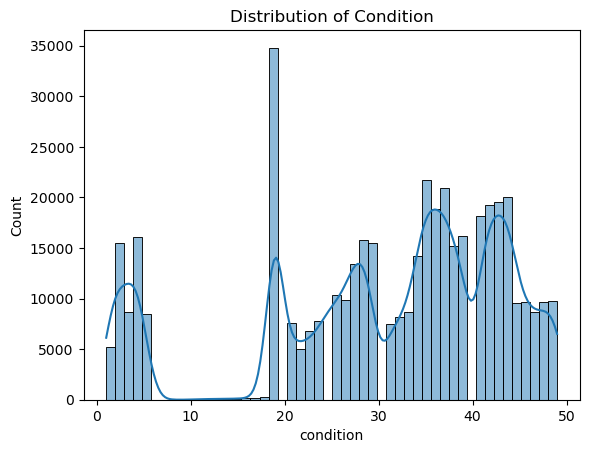

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(dfc['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer')
plt.show()

sns.histplot(dfc['sellingprice'], bins=50, kde=True)
plt.title('Distribution of Selling Price')
plt.show()

sns.histplot(dfc['year'], bins=50, kde=True)
plt.title('Distribution of Year')
plt.show()

sns.histplot(dfc['condition'], bins=50, kde=True)
plt.title('Distribution of Condition')
plt.show()

## 5. Model Implementation

### 5.1 Multiple Linear Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [38]:
X = dfc[['year', 'odometer', 'condition']]
y = dfc['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

LRmod = LinearRegression()
LRmod.fit(X_train, y_train)

y_pred = LRmod.predict(X_test)

mseLRmod = mean_squared_error(y_test, y_pred)
maeLRmod = mean_absolute_error(y_test, y_pred)
r2LRmod = r2_score(y_test, y_pred)
rmseLRmod = np.sqrt(mseLRmod)

print("MSE: ", mseLRmod)
print("MAE: ", maeLRmod)
print("R^2: ", r2LRmod)
print("RMSE: ", rmseLRmod)

MSE:  54608852.21799017
MAE:  5086.462862790553
R^2:  0.39616129609682704
RMSE:  7389.780255054285


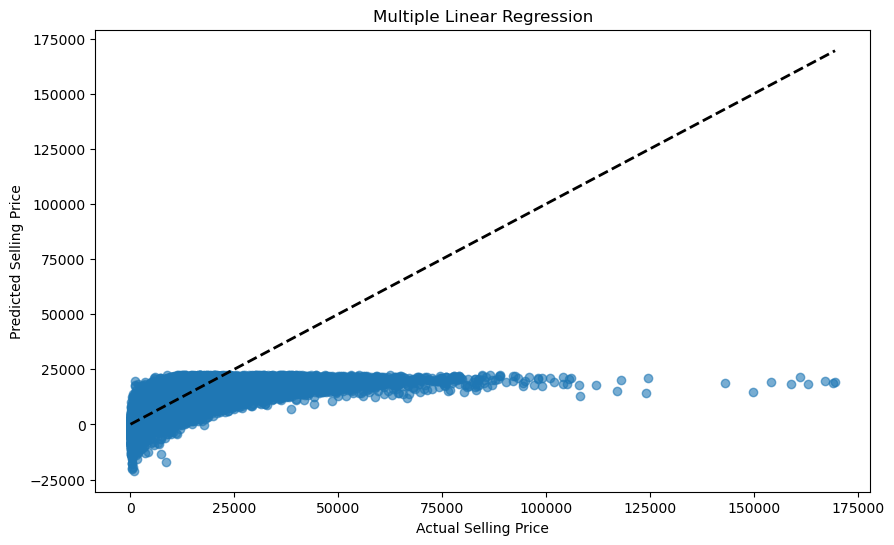

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Multiple Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

### 5.2 Multiple Linear Reg with Lasso and Ridge

In [40]:
from sklearn.linear_model import Lasso, Ridge

In [41]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("Lasso: ")
print("MSE: ", mse_lasso)
print("MAE: ", mae_lasso)
print("R^2: ", r2_lasso)
print("RMSE: ", rmse_lasso)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("Ridge: ")
print("MSE: ", mse_ridge)
print("MAE: ", mae_ridge)
print("R^2: ", r2_ridge)
print("RMSE: ", rmse_ridge)

Lasso: 
MSE:  54608853.38277511
MAE:  5086.462602287749
R^2:  0.39616128321718924
RMSE:  7389.780333864811
Ridge: 
MSE:  54608852.24464272
MAE:  5086.462857354971
R^2:  0.3961612958021158
RMSE:  7389.7802568576235


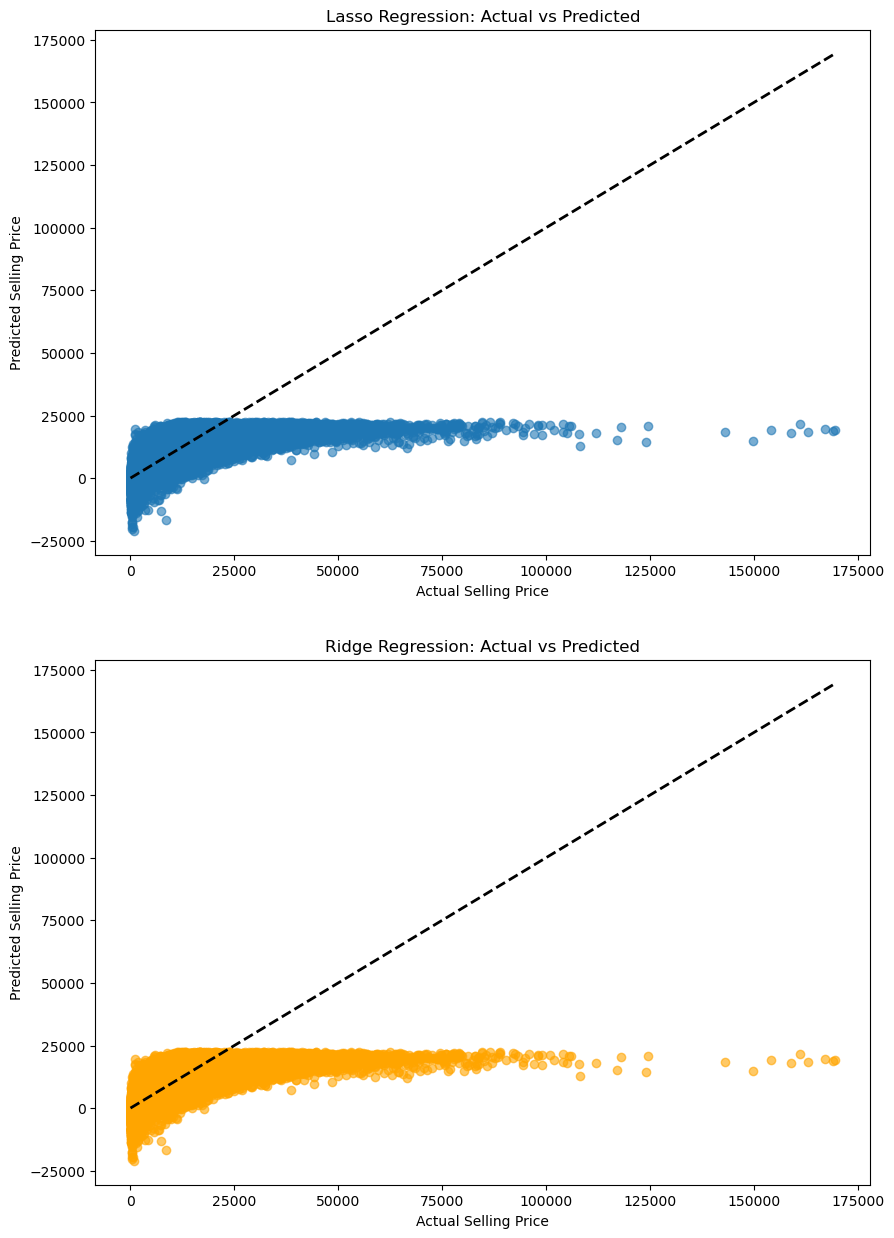

In [42]:
fig, (ax1, ax2) = plt.subplots(2,1 , figsize=(10,15))
ax1.scatter(y_test, y_pred_lasso, alpha = 0.6)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_xlabel("Actual Selling Price")
ax1.set_ylabel("Predicted Selling Price")
ax1.set_title("Lasso Regression: Actual vs Predicted")

ax2.scatter(y_test, y_pred_ridge, alpha=0.6, color = 'orange')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_xlabel("Actual Selling Price")
ax2.set_ylabel("Predicted Selling Price")
ax2.set_title("Ridge Regression: Actual vs Predicted")

plt.show()

### 5.3 K-Fold Cross Validation

In [43]:
from sklearn.model_selection import KFold

X = dfc[['year', 'odometer', 'condition']]
y = dfc['sellingprice']

kf = KFold(n_splits=5, shuffle=True, random_state=1)

LRmod = LinearRegression()

mse_scores = []
mae_scores = []
r2_scores = []
rmse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    LRmod.fit(X_train, y_train)
    y_pred = LRmod.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

print("Average MSE: ", np.mean(mse_scores))
print("Average MAE: ", np.mean(mae_scores))
print("Average R^2: ", np.mean(r2_scores))
print("Average RMSE: ", np.mean(rmse_scores))

Average MSE:  54403560.06970239
Average MAE:  5084.932215051109
Average R^2:  0.3959308191815105
Average RMSE:  7375.570404586397


In [44]:
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(LRmod, X, y, cv=kf, scoring='r2')
print("Cross-validated R^2 scores: ", r2_scores)
print("Average R^2: ", np.mean(r2_scores))

Cross-validated R^2 scores:  [0.3961613  0.39947772 0.39667723 0.39478995 0.39254789]
Average R^2:  0.3959308191815105


### 5.4 Linear Regression with One-Hot Encoding
Added features:
* make
* model
* trim
* body
* transmission
* color
* interior

#### 5.4.1 Package Import

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
df_oh = pd.get_dummies(
    dfc, 
    columns = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
)

X = df_oh.drop('sellingprice', axis=1)
y = df_oh['sellingprice']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

LRmod = LinearRegression()
LRmod.fit(X_train, y_train)

y_pred = LRmod.predict(X_test)

mseLRmod = mean_squared_error(y_test, y_pred)
maeLRmod = mean_absolute_error(y_test, y_pred)
r2LRmod = r2_score(y_test, y_pred)
rmse = np.sqrt(mseLRmod)

print("MSE: ", mseLRmod)
print("MAE: ", maeLRmod)
print("R^2: ", r2LRmod)
print("RMSE: ", rmse)

MSE:  1.7550106787134506e+33
MAE:  567534496073094.2
R^2:  -1.952400731737232e+25
RMSE:  4.189284758420524e+16


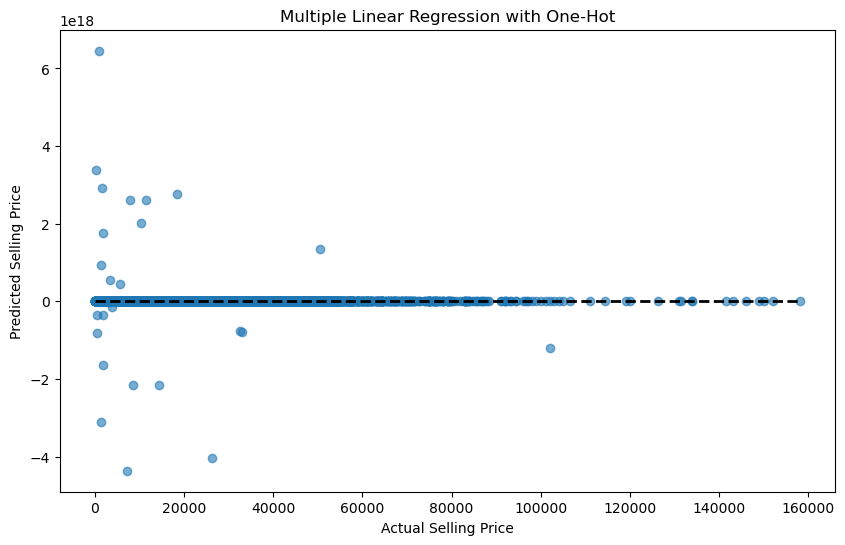

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Multiple Linear Regression with One-Hot")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

### 5.5 Decision Tree Regression

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dfDT = pd.get_dummies(
    dfc, 
    columns=['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
)

X = dfDT.drop('sellingprice', axis=1)
y = dfDT['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

DTmod = DecisionTreeRegressor(random_state = 4)
DTmod.fit(X_train, y_train)

y_pred = DTmod.predict(X_test)

mseDTmod = mean_squared_error(y_test, y_pred)
maeDTmod = mean_absolute_error(y_test, y_pred)
r2DTmod = r2_score(y_test, y_pred)
rmseDTmod = np.sqrt(mseDTmod)

print("MSE: ", mseDTmod)
print("MAE: ", maeDTmod)
print("R^2: ", r2DTmod)
print("RMSE: ", rmseDTmod)

MSE:  4254711.175258203
MAE:  1286.0819851933095
R^2:  0.9525269189658437
RMSE:  2062.695124166003


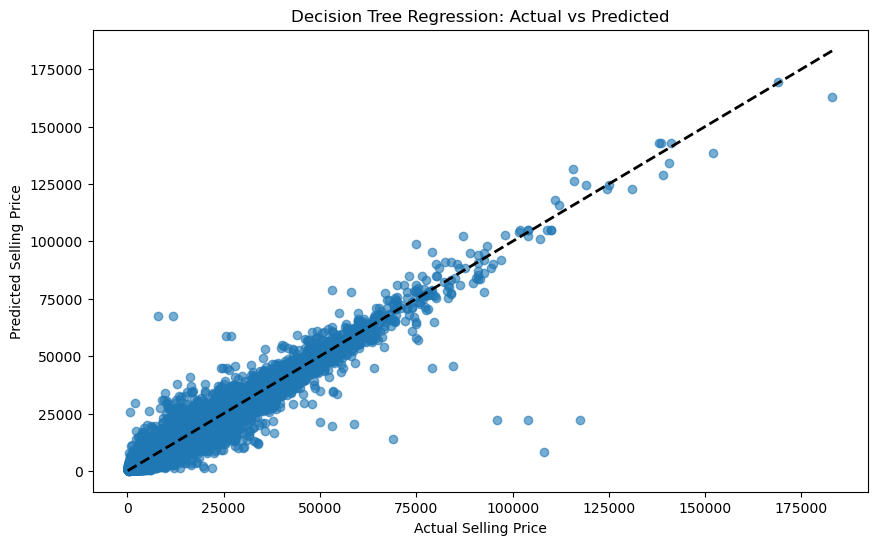

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

### 5.6 Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
dfRF = pd.get_dummies(
    dfc, 
    columns=['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
)

X = dfRF.drop('sellingprice', axis=1)
y = dfRF['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

RFmod = RandomForestRegressor(n_estimators=40, random_state=3)
RFmod.fit(X_train, y_train)

y_pred = RFmod.predict(X_test)

mseRFmod = mean_squared_error(y_test, y_pred)
maeRFmod = mean_absolute_error(y_test, y_pred)
r2RFmod = r2_score(y_test, y_pred)
rmseRFmod = np.sqrt(mseRFmod)

print("MSE: ", mseRFmod)
print("MAE: ", maeRFmod)
print("R^2: ", r2RFmod)
print("RMSE: ", rmseRFmod)

MSE:  2198737.8696241416
MAE:  949.5651954231788
R^2:  0.9757051241704635
RMSE:  1482.8141723169972


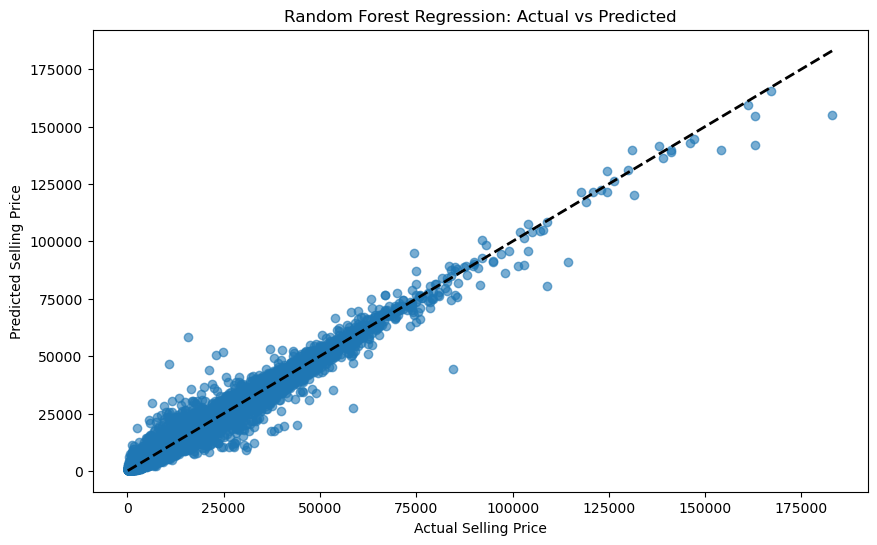

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

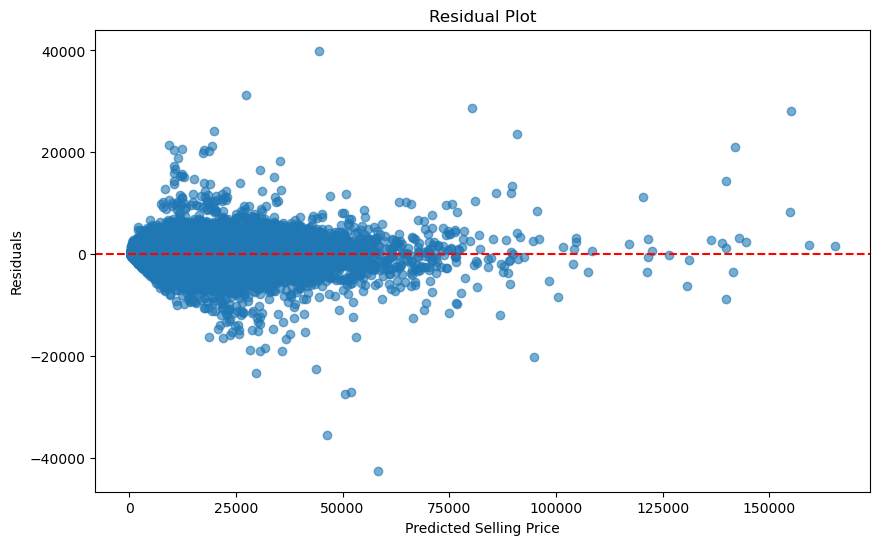

In [34]:
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()